In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import scipy.stats as ss
from Random_Forest import random_forest
#from ipynb.fs.full.EMA_Bootstrap import ema_bootstrap

importing Jupyter notebook from Random_Forest.ipynb
importing Jupyter notebook from Apl2_EMA_Bootstrap_Model.ipynb
(988,)
(737,)
importing Jupyter notebook from Apl3_MACD_bootstrap_Model.ipynb
importing Jupyter notebook from Apl4_SVM_bootstrap_Model.ipynb
importing Jupyter notebook from Apl5_Autoregression_Bootstrap_Model.ipynb
1.3196712635783845
--------------------- Y -------------------------
 [115.8000031 115.8499985 115.9199982 116.7799988 117.9499969 118.7699966
 118.7399979 118.9000015 119.1100006 118.3399963 120.        119.4000015
 120.4499969 120.        119.5500031 120.4199982 121.6699982 122.1399994
 120.9300003 121.1500015 127.0299988 127.9800034 128.3099976 129.1300049
 130.5399933 131.3500061 131.6499939 132.4600067 133.0800018 133.4700012
 135.5200043 135.6699982 135.1000061 136.2299957 136.4299927 137.3800049
 135.9100037 137.1399994 137.0800018 137.8899994 140.        138.7799988
 139.3699951 139.0599976 138.9499969 138.7400055 139.25      138.8500061
 139.3000031 139

AR_RMSE:  1.3196712635783845
EMA_RMSE:  4.2342257138635535
MACD_RMSE:  4.291334332207383
SVM_RMSE:  10.516723705982992
734
random forest rmse:  1.1168624119892643


<Figure size 1600x600 with 0 Axes>

<Figure size 900x900 with 1 Axes>

<Figure size 3000x4500 with 2 Axes>

In [9]:
AAPL = pd.read_csv('AAPL_New.csv')
AAPL.set_index('Date')
AAPL['OpenTmr'] = AAPL['Open'].shift(-1)
AAPL['CloseTmr'] = AAPL['Close'].shift(-1)
AAPL['OpenClose']= (AAPL['Open']+ AAPL['Close'])/2
AAPL['HighLow'] = (AAPL['High']+ AAPL['Low'])/2
AAPL['OCHL'] = (AAPL['Open']+ AAPL['Close']+AAPL['High']+ AAPL['Low'])/4
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close,OpenTmr,CloseTmr,OpenClose,HighLow,OCHL
0,1/4/2016,105.370003,102.000000,102.610001,105.349999,67649400,98.446655,105.750000,102.709999,103.980000,103.685001,103.832500
1,1/5/2016,105.849999,102.410004,105.750000,102.709999,55791000,95.979675,100.559998,100.699997,104.230000,104.130001,104.180000
2,1/6/2016,102.370003,99.870003,100.559998,100.699997,68457400,94.101387,98.680000,96.449997,100.629997,101.120003,100.875000
3,1/7/2016,100.129997,96.430000,98.680000,96.449997,81094400,90.129868,98.550003,96.959999,97.564999,98.279999,97.922499
4,1/8/2016,99.110001,96.760002,98.550003,96.959999,70798000,90.606438,98.970001,98.529999,97.755001,97.935001,97.845001


In [10]:
N = AAPL.shape[0] # total num days
num_boot = 500 # total num bootstrap
T= 300 # start day
window = 200 # training period window

Y =AAPL['OpenTmr'][-(N-(T+1)):].values

rmse,y_hat,Y_close = random_forest()


734
random forest rmse:  1.1168624119892643


In [23]:
len(y_hat)

734

In [24]:
len(Y_close)

735

### DAY TRADE

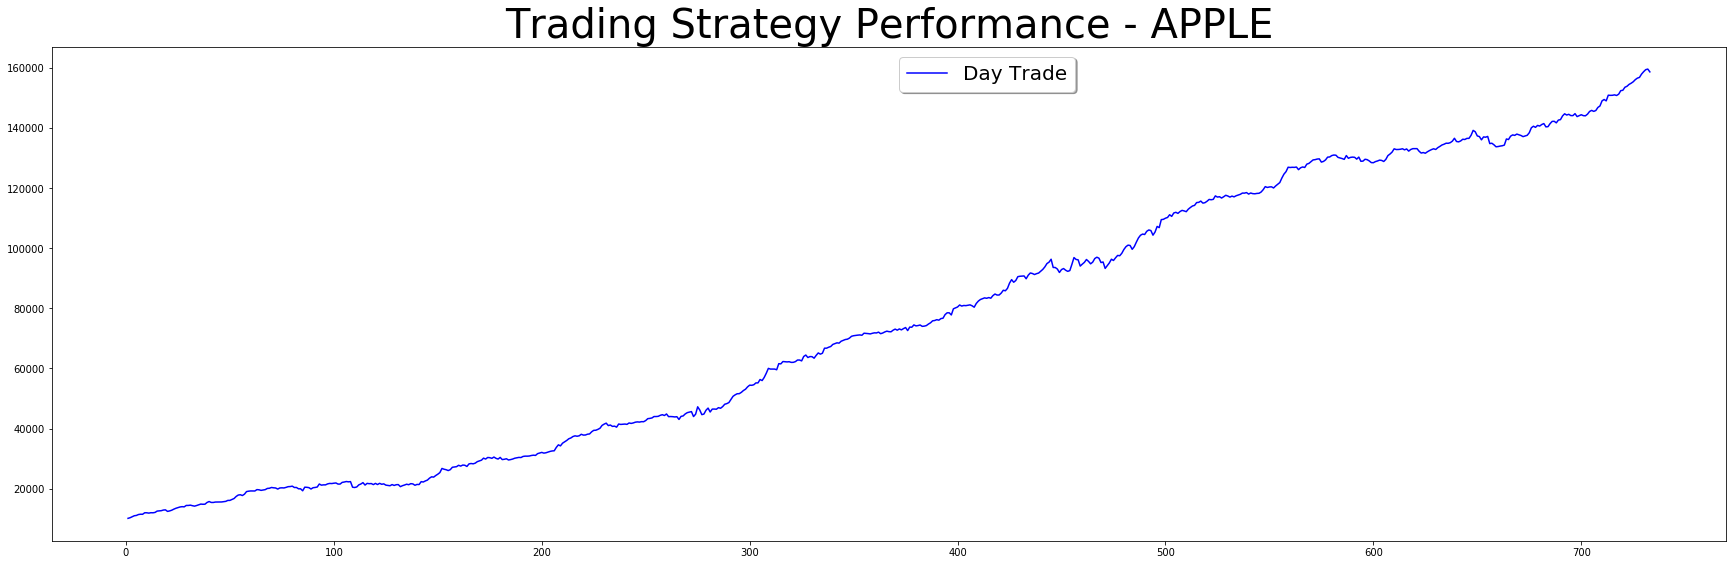

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

#Account Balances
init_bal = 10000 # initial account balance
num_shares = 300 # number of shares being traded in one position

T=y_hat.shape[0]
signal_rule1 =  np.zeros(T)
for t in range(0, T):
    if y_hat[t] > Y[t]:
        signal_rule1[t] = 1  # long signal
    elif y_hat[t] < Y[t]:
        signal_rule1[t] = -1  # short signal
        
pos_rule1 = signal_rule1 # open and close position every day

balance_rule1= np.zeros(T)
temp_bal1 = init_bal

for t in range(0,T):  
    # day trade
    balance_rule1[t] = temp_bal1 - pos_rule1[t]*num_shares*Y[t] + pos_rule1[t]*num_shares*Y_close[t]
    temp_bal1 = balance_rule1[t]

# plot account balance
timevec = np.linspace(1,T-1,T-1)
plt.figure(figsize=(30,20))
ax1 = plt.subplot(211)
ax1.plot(timevec, balance_rule1[1:], 'blue', label = "Day Trade")
ax1.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2, prop={'size': 20})
plt.title('Trading Strategy Performance - APPLE', size=40)
plt.show()


# daily profit and loss
balance_rule1 = np.insert(balance_rule1, 0, init_bal)
profit_loss1 =  np.diff(balance_rule1)

total_profit1 = sum(x for x in profit_loss1 if x>0)    
total_loss1 = abs(sum(x for x in profit_loss1 if x<0))
cnt_profit1 = sum(1 for x in profit_loss1 if x>0)
cnt_loss1 = sum(1 for x in profit_loss1 if x<0)
        
# daily return in percentage
return1 = (balance_rule1 - init_bal)/init_bal*100

# ratios, assuming 3 month T bill rate around 2%
sharpe1 = (np.mean(return1) - 2)/np.std(return1-2)

# xs = np.linspace(-3,3,400)
# plt.plot(xs,den(xs))
# plt.show()

In [17]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
print("Day-Trade Strategy") 
plotly.tools.set_credentials_file(username='nadkar.k', api_key='3vIJbD5p3YrL2sA0E9gs')
trace = go.Table(
   header=dict(values=['Metrics', 'Values']),
   cells=dict(values=[['Amount', 'Shares', 'Number of days','Total profit','Total loss','Profit%','Net profit','Profit factor','Profit days',
                      'Loss days','Winning rate','Average Net Profit Per Trade','Average Daily Return','Daily Return STD'],
                      [init_bal, num_shares, T,total_profit1,total_loss1,(total_profit1/init_bal),total_profit1-total_loss1,
                       total_profit1/total_loss1,cnt_profit1
                      ,cnt_loss1,(cnt_profit1/T),(total_profit1-total_loss1)/T,np.mean(return1),np.std(return1)]]))


data = [trace]
py.iplot(data, filename = 'basic_table')

Day-Trade Strategy


AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'

### LONG SHORT

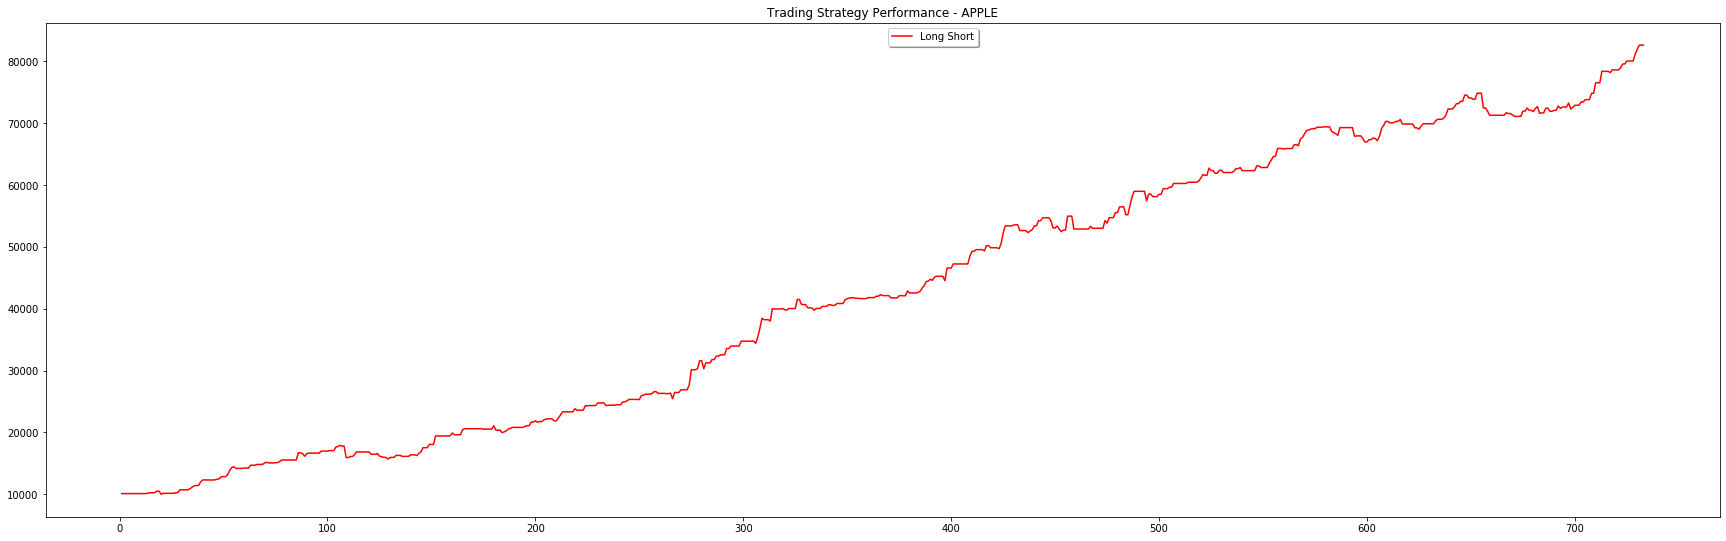

In [18]:
init_bal = 10000 # initial account balance
num_shares = 300 # number of shares being traded in one position

T=y_hat.shape[0]
signal_rule2 = np.zeros(T)
pos_rule2 = np.zeros(T)
for t in range(0, T):
    if y_hat[t] > Y[t]:
        signal_rule2[t] = 1  
    elif y_hat[t] < Y[t]:
        signal_rule2[t] = -1  

for t in range(0, T):
    if t==0:
        pos_rule2[t] = signal_rule2[t]
    elif signal_rule2[t] != signal_rule2[t-1]: 
        # take the first long/short signal as position
        pos_rule2[t] = signal_rule2[t] 

balance_rule2= np.zeros(T)

temp_bal2 = init_bal
for t in range(0,T):  
    # long short
    balance_rule2[t] = temp_bal2 - pos_rule2[t]*num_shares*Y[t] + pos_rule2[t]*num_shares*Y_close[t]
    temp_bal2 = balance_rule2[t]   

# plot account balance
timevec = np.linspace(1,T-1,T-1)
plt.figure(figsize=(30,20))


ax1 = plt.subplot(211)
ax1.plot(timevec, balance_rule2[1:], 'red', label = "Long Short")
ax1.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.title('Trading Strategy Performance - APPLE')
plt.show()

# daily profit and loss


balance_rule2 = np.insert(balance_rule2, 0, init_bal)
profit_loss2 =  np.diff(balance_rule2)

total_profit2 = sum(x for x in profit_loss2 if x>0)    
total_loss2 = abs(sum(x for x in profit_loss2 if x<0))
cnt_profit2 = sum(1 for x in profit_loss2 if x>0)
cnt_loss2 = sum(1 for x in profit_loss2 if x>0)


# daily return in percentage
return2 = (balance_rule2 - init_bal)/init_bal*100

# ratios, assuming 3 month T bill rate around 2%

sharpe2 = (np.mean(return2) - 2)/np.std(return2-2)
# den = ss.gaussian_kde(return1) 
# xs = np.linspace(-3,3,400)
# plt.plot(xs,den(xs))
#plt.show()
den2 = ss.gaussian_kde(return2) 
# xs1 = np.linspace(-3,3,400)
# plt.plot(xs1,den2(xs1))
# plt.show()

In [20]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
print("Long-Short Strategy")
# plotly.tools.set_credentials_file(username='nadkar.k', api_key='3vIJbD5p3YrL2sA0E9gs')
trace = go.Table(
   header=dict(values=['Metrics', 'Values']),
   cells=dict(values=[['Amount', 'Shares', 'Number of days','Total profit','Total loss','Profit%','Net profit','Profit factor','Profit days',
                      'Loss days','Winning rate','Average Net Profit Per Trade','Average Daily Return','Daily Return STD'],
                      [init_bal, num_shares, T,total_profit2,total_loss2,(total_profit2/init_bal),total_profit2-total_loss2,
                       total_profit2/total_loss2,cnt_profit2
                      ,cnt_loss2,(cnt_profit2/T),(total_profit2-total_loss2)/T,np.mean(return2),np.std(return2)]]))


data = [trace]
py.iplot(data, filename = 'basic_table')

Long-Short Strategy


AttributeError: module 'plotly.validators.table' has no attribute 'CellsValidator'